In [2]:
import torch
import numpy as np

**Initializing a Tensor**

In [3]:
# directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# from a numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# from other tensor --> the new one retains the properties (shape, datatype) of the argument tensor
x_ones = torch.ones_like(x_data)  # retains the properties of x_data
print(f"ones tensor: \n {x_ones} \n") 

x_rand = torch.rand_like(x_data, dtype=torch.float)  # override the data type of x_data
print(f"random tensor: \n {x_rand} \n") 


# with random or constant values
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

rand_tensor, ones_tensor, zeros_tensor

ones tensor: 
 tensor([[1, 1],
        [1, 1]]) 

random tensor: 
 tensor([[0.6030, 0.3172],
        [0.6113, 0.9071]]) 



(tensor([[0.0141, 0.7839, 0.2438],
         [0.6096, 0.0075, 0.2626]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

**Attributes of a tensor**: shape, datatype, device

In [4]:
tensor = torch.rand(3, 4)
tensor.shape, tensor.dtype, tensor.device

(torch.Size([3, 4]), torch.float32, device(type='cpu'))

**Operations on tensors**

In [5]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [9]:
# standard numpy-like indexing and slicing
data = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
tensor = torch.tensor(data)

print(f"first row: {tensor[0]}")
print(f"first col: {tensor[:, 0]}")
print(f"last col: {tensor[..., -1]}")
# tensor[:, 1] = 0
# print(tensor)

first row: tensor([1, 2, 3, 4])
first col: tensor([ 1,  5,  9, 13])
last col: tensor([ 4,  8, 12, 16])


In [8]:
# joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[ 1,  0,  3,  4,  1,  0,  3,  4,  1,  0,  3,  4],
        [ 5,  0,  7,  8,  5,  0,  7,  8,  5,  0,  7,  8],
        [ 9,  0, 11, 12,  9,  0, 11, 12,  9,  0, 11, 12],
        [13,  0, 15, 16, 13,  0, 15, 16, 13,  0, 15, 16]])

In [16]:
# arithmetic operations

tensor = torch.ones(4, 4)
# matrix multiplication, tensor.T returns the transpose
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)

torch.matmul(tensor, tensor.T, out=y3)


# this computes the element-wise product: z1, z2 and z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [20]:
# single-element tensors
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


In [21]:
# in-place operations
print(f"{tensor}\n")
tensor.add_(5)
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])

**Tensor to Numpy array (and viceversa)**

In [24]:
t = torch.ones(5)
n = t.numpy()
t, n

# A change in the tensor reflects in the NumPy array
t.add_(1)
t, n

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [25]:
n = np.ones(5)
t = torch.from_numpy(n)

# Changes in the NumPy array reflects in the tensor
np.add(n, 1, out=n)
t, n

(tensor([2., 2., 2., 2., 2.], dtype=torch.float64),
 array([2., 2., 2., 2., 2.]))

**Datasets & DataLoaders**: Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

## Loading a Dataset

How to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [26]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8671221.80it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 145099.90it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2743409.49it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6070361.82it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



**Iterating and visualizing the Dataset**

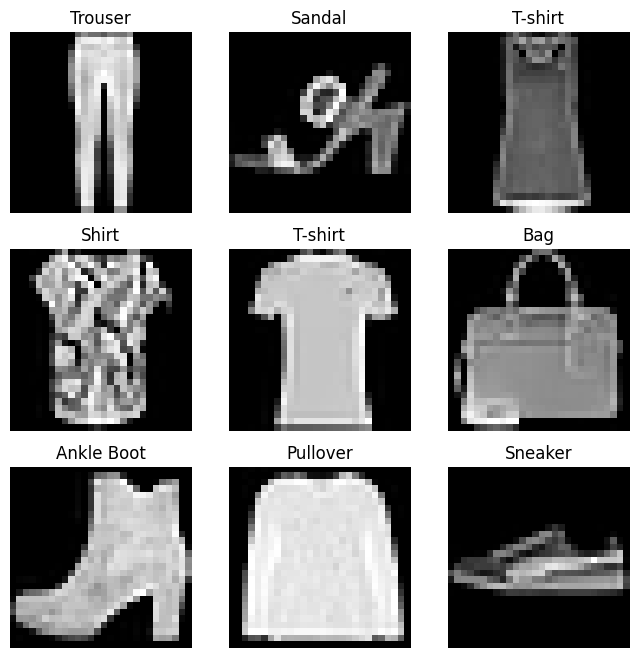

In [27]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1, )).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**Creating a custom dataset for your files**

Functions to be implemented are: 

- __init__
- __len__
- __getitem__

In [29]:
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
# run once when instantiating the Dataset object
# We initialize the directory containing the images, the annotations file, and both transforms
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  # number of samples in the dataset
  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    # Based on the index, it identifies the image's location on disk
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    # converts that to a tensor using read_image
    image = read_image(img_path)
    # loads and returns a sample from the dataset at the given index idx
    # retrieves the corresponding label from the csv data in self.img_labels
    # calls the transform functions on them (if applicable)
    if self.transform:
      image = self.transform(image)
    if self.target_tranform(label):
      label = self.target_transform(label)
    # returns the tensor image and corresponding label in a tuple
    return image, label

**Preparing your data for training with DataLoaders**: While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval.

In [31]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# each iteration returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively)
# shuffle=True --> after we iterate over all batches the data is shuffled

**Iterate through the DataLoader**

feature batch shape: torch.Size([64, 1, 28, 28])
labels batch shape: torch.Size([64])


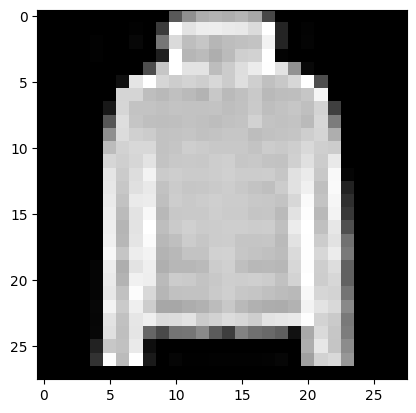

label: 4


In [33]:
# display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"feature batch shape: {train_features.size()}")
print(f"labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"label: {label}")

**TRANSFORMS**: perform some manipulation of the data and make it suitable for training.

- transform modifies the features 
- target_transform modifies the labels

In [34]:
# The FashionMNIST features are in PIL Image format, and the labels are integers.
# For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
# To make these transformations, we use ToTensor and Lambda.

from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [35]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))